In [601]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings("ignore")

## Problem Statement 

To Predict The Price of Home By Considering Some Home Features 

## Data Gathering 

In [602]:
df = pd.read_csv("Bengaluru_House_Data.csv")
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


## EDA ---> Exploratory Data Analysis 

In [603]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [604]:
df.isna().mean()*100

area_type        0.000000
availability     0.000000
location         0.007508
size             0.120120
society         41.306306
total_sqft       0.000000
bath             0.548048
balcony          4.572072
price            0.000000
dtype: float64

In [605]:
df.drop("society",axis=1,inplace=True)

#### 1. df["area_type"]

In [606]:
df["area_type"].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [607]:
df["area_type"].nunique()

4

In [608]:
df["area_type"].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [609]:
df["area_type"].isna().sum()

0

In [610]:
df = pd.get_dummies(df,columns=["area_type"])
df

,availability,location,size,total_sqft,bath,balcony,price,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area
0,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,0,0,0,1
1,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,0,0,1,0
2,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,1,0,0,0
3,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,0,0,0,1
4,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
13315,Ready To Move,Whitefield,5 Bedroom,3453,4.0,0.0,231.00,1,0,0,0
13316,Ready To Move,Richards Town,4 BHK,3600,5.0,NaN,400.00,0,0,0,1
13317,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00,1,0,0,0
13318,18-Jun,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00,0,0,0,1


In [611]:
df["area_type_Built_up_Area"] = df["area_type_Built-up  Area"]

In [612]:
df["area_type_Carpet_Area"] = df["area_type_Carpet  Area"] 

In [613]:
df["area_type_Plot_Area"] = df["area_type_Plot  Area"]

In [614]:
df["area_type_Super_built_up_Area"] = df["area_type_Super built-up  Area"]

In [615]:
df.drop(df.iloc[:,7:11],axis=1,inplace=True)

In [616]:
df

,availability,location,size,total_sqft,bath,balcony,price,area_type_Built_up_Area,area_type_Carpet_Area,area_type_Plot_Area,area_type_Super_built_up_Area
0,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,0,0,0,1
1,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,0,0,1,0
2,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,1,0,0,0
3,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,0,0,0,1
4,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
13315,Ready To Move,Whitefield,5 Bedroom,3453,4.0,0.0,231.00,1,0,0,0
13316,Ready To Move,Richards Town,4 BHK,3600,5.0,NaN,400.00,0,0,0,1
13317,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00,1,0,0,0
13318,18-Jun,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00,0,0,0,1


#### 2. df["availability"]

In [617]:
df["availability"].nunique()

81

In [618]:
df["availability"].unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       'Immediate Possession', '19-May', '17-Nov', '20-Oct', '20-Jun',
       '19-Feb', '21-Oct', '21-Jan', '17-Mar', '17-Apr', '22-May',
       '19-Oct', '21-Jul', '21-Nov', '21-Mar', '16-Dec', '22-Mar',
       '20-Jan', '21-Sep', '21-Aug', '14-Nov', '19-Nov', '15-Nov',
       '16-Jul', '15-Jun', '17-Feb', '20-Nov', '20-Jul', '16-Sep',
       '15-Oct', '15-Dec', '16-Oct', '22-Nov', '15-Aug', '17-Jan',
       '16-Nov', '20-Apr', '16-Jan', '14-Jul'], dtype=object)

In [619]:
df["availability"].replace({"Ready To Move":'01-Jan'},inplace=True)
df["availability"].replace({"Immediate Possession":'02-Jan'},inplace=True)

In [620]:
import re 
import datetime

def availability(a,a1 = "%d-%b"):
    lst = []
    b = datetime.datetime.strptime(a,a1).date()
    date = b.day
    month = b.month
    lst.append(month)
    lst.append(date)
#     print(date)
#     print(month)
    return date , month
a = '02-Jan'

availability(a)

(2, 1)

In [621]:
df["availability"] = df["availability"].apply(availability)

In [622]:
# df["availability"] = df["availability"].apply(lambda x: str(x))

In [623]:
df["availability"] = df["availability"].sort_values(ascending=False)
df["availability"]

0        (19, 12)
1          (1, 1)
2          (1, 1)
3          (1, 1)
4          (1, 1)
           ...   
13315      (1, 1)
13316      (1, 1)
13317      (1, 1)
13318     (18, 6)
13319      (1, 1)
Name: availability, Length: 13320, dtype: object

In [630]:
dict_lst = []
for i in df["availability"].sort_values():
    if i not in dict_lst:
        dict_lst.append(i)
        
# dict_lst = str(dict_lst)
# dict_lst = eval(dict_lst)
# dict_lst = str(dict_lst)
dict_lst

[(1, 1),
 (2, 1),
 (14, 7),
 (14, 11),
 (15, 6),
 (15, 8),
 (15, 10),
 (15, 11),
 (15, 12),
 (16, 1),
 (16, 3),
 (16, 7),
 (16, 9),
 (16, 10),
 (16, 11),
 (16, 12),
 (17, 1),
 (17, 2),
 (17, 3),
 (17, 4),
 (17, 5),
 (17, 6),
 (17, 7),
 (17, 8),
 (17, 9),
 (17, 10),
 (17, 11),
 (17, 12),
 (18, 1),
 (18, 2),
 (18, 3),
 (18, 4),
 (18, 5),
 (18, 6),
 (18, 7),
 (18, 8),
 (18, 9),
 (18, 10),
 (18, 11),
 (18, 12),
 (19, 1),
 (19, 2),
 (19, 3),
 (19, 4),
 (19, 5),
 (19, 6),
 (19, 7),
 (19, 8),
 (19, 9),
 (19, 10),
 (19, 11),
 (19, 12),
 (20, 1),
 (20, 2),
 (20, 3),
 (20, 4),
 (20, 5),
 (20, 6),
 (20, 7),
 (20, 8),
 (20, 9),
 (20, 10),
 (20, 11),
 (20, 12),
 (21, 1),
 (21, 2),
 (21, 3),
 (21, 5),
 (21, 6),
 (21, 7),
 (21, 8),
 (21, 9),
 (21, 10),
 (21, 11),
 (21, 12),
 (22, 1),
 (22, 3),
 (22, 5),
 (22, 6),
 (22, 11),
 (22, 12)]

In [625]:
type(dict_lst[0])

tuple

In [626]:
empty_lst = np.arange(0,81)
(empty_lst)  

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80])

In [627]:
# availability_dict = dict(zip(dict_lst,empty_lst))
availability_dict={"(1, 1)": 0,
 '(14, 11)': 1,
 '(14, 7)': 2,
 '(15, 10)': 3,
 '(15, 11)': 4,
 '(15, 12)': 5,
 '(15, 6)': 6,
 '(15, 8)': 7,
 '(16, 1)': 8,
 '(16, 10)': 9,
 '(16, 11)': 10,
 '(16, 12)': 11,
 '(16, 3)': 12,
 '(16, 7)': 13,
 '(16, 9)': 14,
 '(17, 1)': 15,
 '(17, 10)': 16,
 '(17, 11)': 17,
 '(17, 12)': 18,
 '(17, 2)': 19,
 '(17, 3)': 20,
 '(17, 4)': 21,
 '(17, 5)': 22,
 '(17, 6)': 23,
 '(17, 7)': 24,
 '(17, 8)': 25,
 '(17, 9)': 26,
 '(18, 1)': 27,
 '(18, 10)': 28,
 '(18, 11)': 29,
 '(18, 12)': 30,
 '(18, 2)': 31,
 '(18, 3)': 32,
 '(18, 4)': 33,
 '(18, 5)': 34,
 '(18, 6)': 35,
 '(18, 7)': 36,
 '(18, 8)': 37,
 '(18, 9)': 38,
 '(19, 1)': 39,
 '(19, 10)': 40,
 '(19, 11)': 41,
 '(19, 12)': 42,
 '(19, 2)': 43,
 '(19, 3)': 44,
 '(19, 4)': 45,
 '(19, 5)': 46,
 '(19, 6)': 47,
 '(19, 7)': 48,
 '(19, 8)': 49,
 '(19, 9)': 50,
 '(2, 1)': 51,
 '(20, 1)': 52,
 '(20, 10)': 53,
 '(20, 11)': 54,
 '(20, 12)': 55,
 '(20, 2)': 56,
 '(20, 3)': 57,
 '(20, 4)': 58,
 '(20, 5)': 59,
 '(20, 6)': 60,
 '(20, 7)': 61,
 '(20, 8)': 62,
 '(20, 9)': 63,
 '(21, 1)': 64,
 '(21, 10)': 65,
 '(21, 11)': 66,
 '(21, 12)': 67,
 '(21, 2)': 68,
 '(21, 3)': 69,
 '(21, 5)': 70,
 '(21, 6)': 71,
 '(21, 7)': 72,
 '(21, 8)': 73,
 '(21, 9)': 74,
 '(22, 1)': 75,
 '(22, 11)': 76,
 '(22, 12)': 77,
 '(22, 3)': 78,
 '(22, 5)': 79,
 '(22, 6)': 80}


In [600]:
df["availability"]=df["availability"].apply(lambda x:str(x))
df["availability"]

0        42
1         0
2         0
3         0
4         0
         ..
13315     0
13316     0
13317     0
13318    35
13319     0
Name: availability, Length: 13320, dtype: object

In [496]:
df["availability"][0]

'(19, 12)'

In [497]:
df["availability"]= df["availability"].replace({"(1, 1)": 0,
 '(14, 11)': 1,
 '(14, 7)': 2,
 '(15, 10)': 3,
 '(15, 11)': 4,
 '(15, 12)': 5,
 '(15, 6)': 6,
 '(15, 8)': 7,
 '(16, 1)': 8,
 '(16, 10)': 9,
 '(16, 11)': 10,
 '(16, 12)': 11,
 '(16, 3)': 12,
 '(16, 7)': 13,
 '(16, 9)': 14,
 '(17, 1)': 15,
 '(17, 10)': 16,
 '(17, 11)': 17,
 '(17, 12)': 18,
 '(17, 2)': 19,
 '(17, 3)': 20,
 '(17, 4)': 21,
 '(17, 5)': 22,
 '(17, 6)': 23,
 '(17, 7)': 24,
 '(17, 8)': 25,
 '(17, 9)': 26,
 '(18, 1)': 27,
 '(18, 10)': 28,
 '(18, 11)': 29,
 '(18, 12)': 30,
 '(18, 2)': 31,
 '(18, 3)': 32,
 '(18, 4)': 33,
 '(18, 5)': 34,
 '(18, 6)': 35,
 '(18, 7)': 36,
 '(18, 8)': 37,
 '(18, 9)': 38,
 '(19, 1)': 39,
 '(19, 10)': 40,
 '(19, 11)': 41,
 '(19, 12)': 42,
 '(19, 2)': 43,
 '(19, 3)': 44,
 '(19, 4)': 45,
 '(19, 5)': 46,
 '(19, 6)': 47,
 '(19, 7)': 48,
 '(19, 8)': 49,
 '(19, 9)': 50,
 '(2, 1)': 51,
 '(20, 1)': 52,
 '(20, 10)': 53,
 '(20, 11)': 54,
 '(20, 12)': 55,
 '(20, 2)': 56,
 '(20, 3)': 57,
 '(20, 4)': 58,
 '(20, 5)': 59,
 '(20, 6)': 60,
 '(20, 7)': 61,
 '(20, 8)': 62,
 '(20, 9)': 63,
 '(21, 1)': 64,
 '(21, 10)': 65,
 '(21, 11)': 66,
 '(21, 12)': 67,
 '(21, 2)': 68,
 '(21, 3)': 69,
 '(21, 5)': 70,
 '(21, 6)': 71,
 '(21, 7)': 72,
 '(21, 8)': 73,
 '(21, 9)': 74,
 '(22, 1)': 75,
 '(22, 11)': 76,
 '(22, 12)': 77,
 '(22, 3)': 78,
 '(22, 5)': 79,
 '(22, 6)': 80})

In [498]:
df["availability"]

0        42
1         0
2         0
3         0
4         0
         ..
13315     0
13316     0
13317     0
13318    35
13319     0
Name: availability, Length: 13320, dtype: int64

In [499]:
df

,availability,location,size,total_sqft,bath,balcony,price,area_type_Built_up_Area,area_type_Carpet_Area,area_type_Plot_Area,area_type_Super_built_up_Area
0,42,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,0,0,0,1
1,0,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,0,0,1,0
2,0,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,1,0,0,0
3,0,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,0,0,0,1
4,0,Kothanur,2 BHK,1200,2.0,1.0,51.00,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
13315,0,Whitefield,5 Bedroom,3453,4.0,0.0,231.00,1,0,0,0
13316,0,Richards Town,4 BHK,3600,5.0,NaN,400.00,0,0,0,1
13317,0,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00,1,0,0,0
13318,35,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00,0,0,0,1


#### 3. df["location"]

In [500]:
df["location"].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [501]:
df["location"].nunique()

1305

In [502]:
df.drop("location",axis=1,inplace=True)

In [503]:
df

,availability,size,total_sqft,bath,balcony,price,area_type_Built_up_Area,area_type_Carpet_Area,area_type_Plot_Area,area_type_Super_built_up_Area
0,42,2 BHK,1056,2.0,1.0,39.07,0,0,0,1
1,0,4 Bedroom,2600,5.0,3.0,120.00,0,0,1,0
2,0,3 BHK,1440,2.0,3.0,62.00,1,0,0,0
3,0,3 BHK,1521,3.0,1.0,95.00,0,0,0,1
4,0,2 BHK,1200,2.0,1.0,51.00,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
13315,0,5 Bedroom,3453,4.0,0.0,231.00,1,0,0,0
13316,0,4 BHK,3600,5.0,NaN,400.00,0,0,0,1
13317,0,2 BHK,1141,2.0,1.0,60.00,1,0,0,0
13318,35,4 BHK,4689,4.0,1.0,488.00,0,0,0,1


#### 4. df["size"]

In [504]:
df["size"].nunique()

31

In [505]:
df["size"].isna().sum()

16

In [506]:
df["size"] = df["size"].fillna(df["size"].mode()[0])

In [507]:
df["size"].isna().sum()

0

In [508]:
df["size"].value_counts().to_dict()

{'2 BHK': 5215,
 '3 BHK': 4310,
 '4 Bedroom': 826,
 '4 BHK': 591,
 '3 Bedroom': 547,
 '1 BHK': 538,
 '2 Bedroom': 329,
 '5 Bedroom': 297,
 '6 Bedroom': 191,
 '1 Bedroom': 105,
 '8 Bedroom': 84,
 '7 Bedroom': 83,
 '5 BHK': 59,
 '9 Bedroom': 46,
 '6 BHK': 30,
 '7 BHK': 17,
 '1 RK': 13,
 '10 Bedroom': 12,
 '9 BHK': 8,
 '8 BHK': 5,
 '11 BHK': 2,
 '11 Bedroom': 2,
 '10 BHK': 2,
 '14 BHK': 1,
 '13 BHK': 1,
 '12 Bedroom': 1,
 '27 BHK': 1,
 '43 Bedroom': 1,
 '16 BHK': 1,
 '19 BHK': 1,
 '18 Bedroom': 1}

In [509]:
size_dict = {'1 RK': 0,'1 Bedroom': 1,'2 Bedroom': 2,'3 Bedroom': 3,'4 Bedroom': 4,
 '1 BHK': 5,'5 Bedroom': 6,'2 BHK': 7,'6 Bedroom': 8,'3 BHK': 9,'4 BHK': 10,
 '7 Bedroom': 11,'8 Bedroom': 12,'5 BHK': 13,'9 Bedroom': 14,'6 BHK': 15,'7 BHK': 16,
 '10 Bedroom': 17,'8 BHK': 18,'11 Bedroom': 19,'12 Bedroom': 20,'9 BHK': 21,'10 BHK': 22, '11 BHK': 23,
'13 BHK': 24,'14 BHK': 25,'18 Bedroom': 26,'16 BHK': 27, '19 BHK': 28,'27 BHK': 29,'43 Bedroom': 30}

In [510]:
size_dict

{'1 RK': 0,
 '1 Bedroom': 1,
 '2 Bedroom': 2,
 '3 Bedroom': 3,
 '4 Bedroom': 4,
 '1 BHK': 5,
 '5 Bedroom': 6,
 '2 BHK': 7,
 '6 Bedroom': 8,
 '3 BHK': 9,
 '4 BHK': 10,
 '7 Bedroom': 11,
 '8 Bedroom': 12,
 '5 BHK': 13,
 '9 Bedroom': 14,
 '6 BHK': 15,
 '7 BHK': 16,
 '10 Bedroom': 17,
 '8 BHK': 18,
 '11 Bedroom': 19,
 '12 Bedroom': 20,
 '9 BHK': 21,
 '10 BHK': 22,
 '11 BHK': 23,
 '13 BHK': 24,
 '14 BHK': 25,
 '18 Bedroom': 26,
 '16 BHK': 27,
 '19 BHK': 28,
 '27 BHK': 29,
 '43 Bedroom': 30}

In [511]:
df["size"].replace({'1 RK': 0,
 '1 Bedroom': 1,
 '2 Bedroom': 2,
 '3 Bedroom': 3,
 '4 Bedroom': 4,
 '1 BHK': 5,
 '5 Bedroom': 6,
 '2 BHK': 7,
 '6 Bedroom': 8,
 '3 BHK': 9,
 '4 BHK': 10,
 '7 Bedroom': 11,
 '8 Bedroom': 12,
 '5 BHK': 13,
 '9 Bedroom': 14,
 '6 BHK': 15,
 '7 BHK': 16,
 '10 Bedroom': 17,
 '8 BHK': 18,
 '11 Bedroom': 19,
 '12 Bedroom': 20,
 '9 BHK': 21,
 '10 BHK': 22,
 '11 BHK': 23,
 '13 BHK': 24,
 '14 BHK': 25,
 '18 Bedroom': 26,
 '16 BHK': 27,
 '19 BHK': 28,
 '27 BHK': 29,
 '43 Bedroom': 30},inplace=True)

#### 5. df["total_sqft"]

In [512]:
df["total_sqft"].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [513]:
df["total_sqft"].nunique()

2117

In [514]:
df["total_sqft"].value_counts()

1200    843
1100    221
1500    205
2400    196
600     180
       ... 
3580      1
2461      1
1437      1
2155      1
4689      1
Name: total_sqft, Length: 2117, dtype: int64

In [515]:
df["total_sqft"].isna().sum()

0

In [516]:
df["total_sqft"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 13320 entries, 0 to 13319
Series name: total_sqft
Non-Null Count  Dtype 
--------------  ----- 
13320 non-null  object
dtypes: object(1)
memory usage: 104.2+ KB


In [517]:
# df["total_sqft"].astype(int)

In [518]:
string  = '2100 - 2850'
string1 = '2600'
new = "34.46Sq. Meter"
import re 
re.findall("[^a-zA-z]+",string1)[0]

'2600'

In [519]:
import re 
a = string.split("-")
# a = string.split(".")
b = []
for i in a :
#     print(i.strip())
    b.append(eval(i))
add = 0    
for j in b:
    add = add + j
print(add)

    

4950


In [1]:
def average_sqft(string):
    string = re.findall("[^a-zA-z]+",string)[0]
    a = string.split("-")
    b = []
    for i in a :
        i = i.strip()
        b.append(eval(i))
    add = 0    
    for j in b:
        add = (add + j)
    return add

string  = "34.46Sq. Meter"
average_sqft(string)

NameError: name 're' is not defined

In [521]:
df["total_sqft"] = df["total_sqft"].apply(average_sqft)

In [522]:
df["total_sqft"].isna().sum()

0

In [523]:
df["total_sqft"]

0        1056.0
1        2600.0
2        1440.0
3        1521.0
4        1200.0
          ...  
13315    3453.0
13316    3600.0
13317    1141.0
13318    4689.0
13319     550.0
Name: total_sqft, Length: 13320, dtype: float64

##### 6. df["bath"]

In [524]:
df["bath"]

0        2.0
1        5.0
2        2.0
3        3.0
4        2.0
        ... 
13315    4.0
13316    5.0
13317    2.0
13318    4.0
13319    1.0
Name: bath, Length: 13320, dtype: float64

In [525]:
df["bath"].isna().sum()

73

In [526]:
df["bath"] = df["bath"].fillna(df["bath"].median())

In [527]:
df["bath"].isna().sum()

0

<AxesSubplot:>

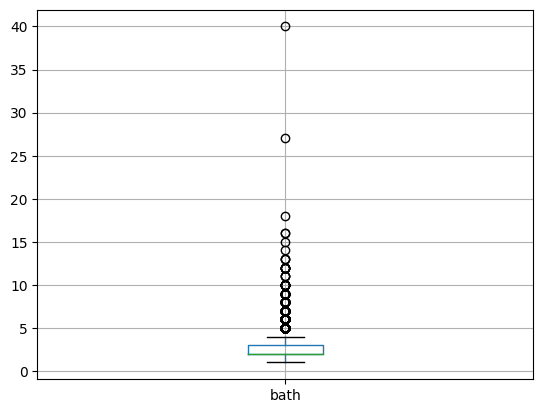

In [528]:
df[["bath"]].boxplot()

In [529]:
q1 = df["bath"].quantile(0.25)
q2 = df["bath"].quantile(0.50)
q3 = df["bath"].quantile(0.75)
median = df["bath"].median()

iqr = q3 - q1
upper_tail = q3 + 1.5*iqr
lower_tail = q1 - 1.5*iqr
print("Q1 :",q1)
print("Q2 :",q2)
print("Q3 :",q3)
print("Median :",median)
print("upper_tail :",upper_tail)
print("lower_tail :",lower_tail)

Q1 : 2.0
Q2 : 2.0
Q3 : 3.0
Median : 2.0
upper_tail : 4.5
lower_tail : 0.5


In [530]:
df["bath"].loc[df["bath"] > upper_tail]
median = df[["bath"]].loc[df["bath"] < upper_tail].median()
print(median)

bath    2.0
dtype: float64


In [531]:
df["bath"].loc[df["bath"] > upper_tail] = median
df["bath"].loc[df["bath"] > upper_tail]

Series([], Name: bath, dtype: float64)

<AxesSubplot:>

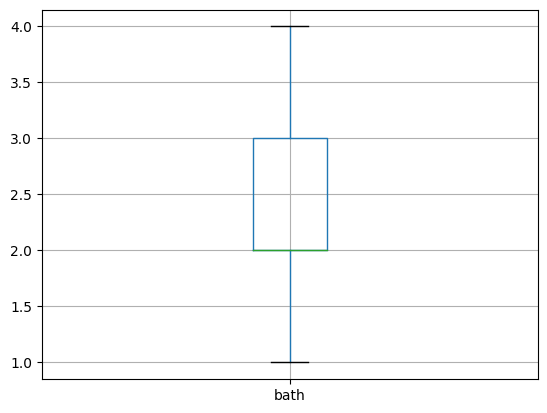

In [532]:
df[["bath"]].boxplot()

In [533]:
df["bath"] = df["bath"].fillna(df["bath"].median())

In [534]:
df["bath"].isna().sum()

0

#### 7. df["balcony"]

In [535]:
df["balcony"]

0        1.0
1        3.0
2        3.0
3        1.0
4        1.0
        ... 
13315    0.0
13316    NaN
13317    1.0
13318    1.0
13319    1.0
Name: balcony, Length: 13320, dtype: float64

In [536]:
df["balcony"].isna().sum()

609

In [537]:
df["balcony"] = df["balcony"].fillna(df["balcony"].median())

In [538]:
df["balcony"] = df["balcony"].astype(int)

In [539]:
df["balcony"].unique()

array([1, 3, 2, 0])

In [540]:
df["balcony"].nunique()

4

In [541]:
df["balcony"].value_counts().to_dict()

{2: 5722, 1: 4897, 3: 1672, 0: 1029}

In [542]:
df["balcony"].isna().sum()

0

<AxesSubplot:>

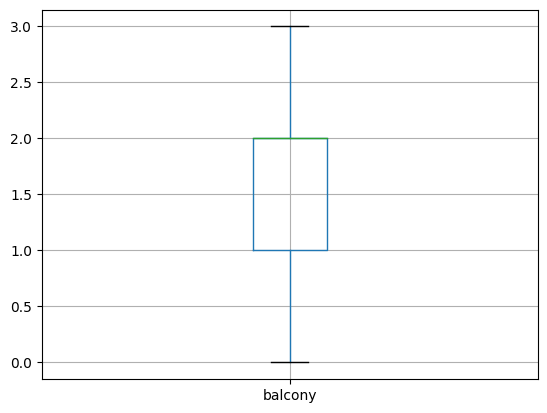

In [543]:
df[["balcony"]].boxplot()

# Remove Outlier 

<AxesSubplot:xlabel='size'>

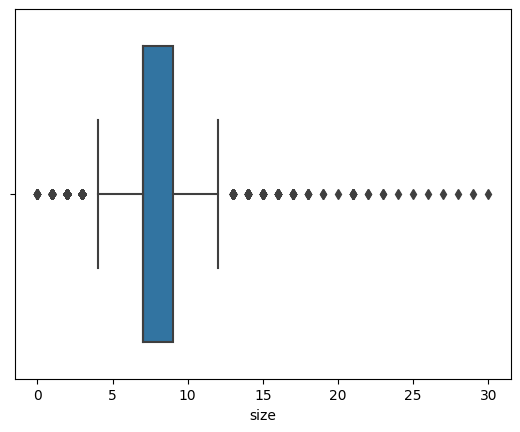

In [544]:
sns.boxplot(df["size"])

In [545]:
q1 = df["size"].quantile(0.25)
q2 = df["size"].quantile(0.50)
q3 = df["size"].quantile(0.75)
median = df["size"].median()

iqr = q3 - q1
upper_tail = q3 + 1.5*iqr
lower_tail = q1 - 1.5*iqr
print("Q1 :",q1)
print("Q2 :",q2)
print("Q3 :",q3)
print("Median :",median)
print("upper_tail :",upper_tail)
print("lower_tail :",lower_tail)

Q1 : 7.0
Q2 : 7.0
Q3 : 9.0
Median : 7.0
upper_tail : 12.0
lower_tail : 4.0


In [546]:
median = df["size"].loc[(df["size"] < upper_tail) & (df["size"] > lower_tail)].median()
median

7.0

In [547]:
df["size"].loc[(df["size"] > upper_tail) | (df["size"] < lower_tail)] = median

In [548]:
df["size"].loc[(df["size"] > upper_tail) | (df["size"] < lower_tail)] 

Series([], Name: size, dtype: int64)

<AxesSubplot:xlabel='size'>

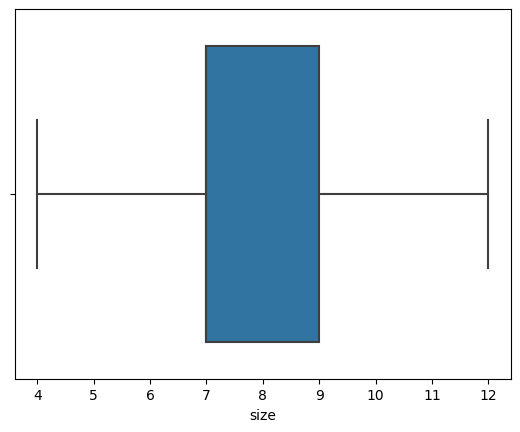

In [549]:
sns.boxplot(df["size"])

In [550]:
df["total_sqft"].unique()

array([1056., 2600., 1440., ..., 2517.,  774., 4689.])

<AxesSubplot:xlabel='total_sqft'>

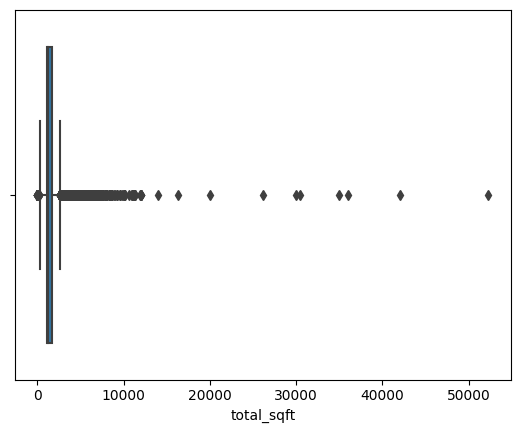

In [551]:
sns.boxplot(df["total_sqft"])

In [552]:
q1 = df["total_sqft"].quantile(0.25)
q2 = df["total_sqft"].quantile(0.50)
q3 = df["total_sqft"].quantile(0.75)
median = df["total_sqft"].median()

iqr = q3 - q1
upper_tail = q3 + 1.5*iqr
lower_tail = q1 - 1.5*iqr
print("Q1 :",q1)
print("Q2 :",q2)
print("Q3 :",q3)
print("Median :",median)
print("upper_tail :",upper_tail)
print("lower_tail :",lower_tail)

Q1 : 1100.0
Q2 : 1280.0
Q3 : 1691.0
Median : 1280.0
upper_tail : 2577.5
lower_tail : 213.5


In [553]:
median = df["total_sqft"].loc[(df["total_sqft"] < upper_tail) & (df["total_sqft"] > lower_tail) ].median()
df["total_sqft"].loc[(df["total_sqft"] > upper_tail) | (df["total_sqft"] < lower_tail) ] = median
df["total_sqft"].loc[(df["total_sqft"] > upper_tail) | (df["total_sqft"] < lower_tail) ] 


Series([], Name: total_sqft, dtype: float64)

In [554]:
# df["total_sqft"].loc[(df["total_sqft"] > upper_tail) | (df["total_sqft"] < lower_tail) ] = median

In [555]:
# df["total_sqft"].loc[(df["total_sqft"] > upper_tail) | (df["total_sqft"] < lower_tail) ] 

<AxesSubplot:xlabel='total_sqft'>

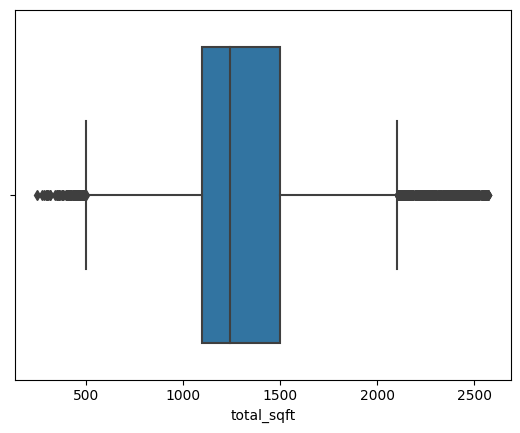

In [556]:
sns.boxplot(df["total_sqft"])

<AxesSubplot:xlabel='bath'>

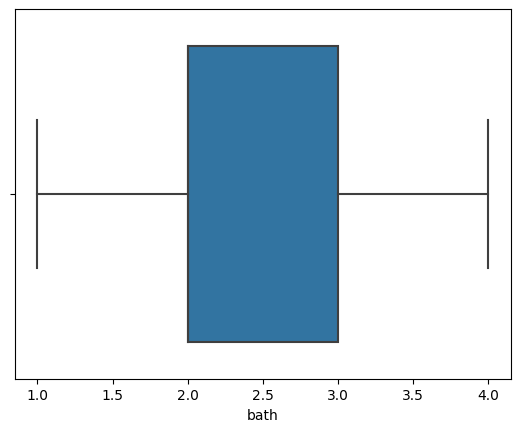

In [557]:
sns.boxplot(df["bath"])

In [558]:
q1 = df["bath"].quantile(0.25)
q2 = df["bath"].quantile(0.50)
q3 = df["bath"].quantile(0.75)
median = df["bath"].median()

iqr = q3 - q1
upper_tail = q3 + 1.5*iqr
lower_tail = q1 - 1.5*iqr
print("Q1 :",q1)
print("Q2 :",q2)
print("Q3 :",q3)
print("Median :",median)
print("upper_tail :",upper_tail)
print("lower_tail :",lower_tail)

Q1 : 2.0
Q2 : 2.0
Q3 : 3.0
Median : 2.0
upper_tail : 4.5
lower_tail : 0.5


In [559]:
median = df["bath"].loc[(df["bath"] < upper_tail) & (df["bath"] > lower_tail) ].median()
df["bath"].loc[(df["bath"] > upper_tail) | (df["bath"] < lower_tail) ] = median
df["bath"].loc[(df["bath"] > upper_tail) | (df["bath"] < lower_tail) ] 


Series([], Name: bath, dtype: float64)

<AxesSubplot:xlabel='bath'>

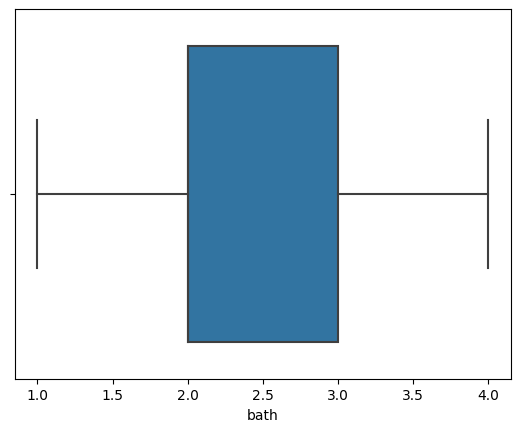

In [560]:
sns.boxplot(df["bath"])

<AxesSubplot:xlabel='balcony'>

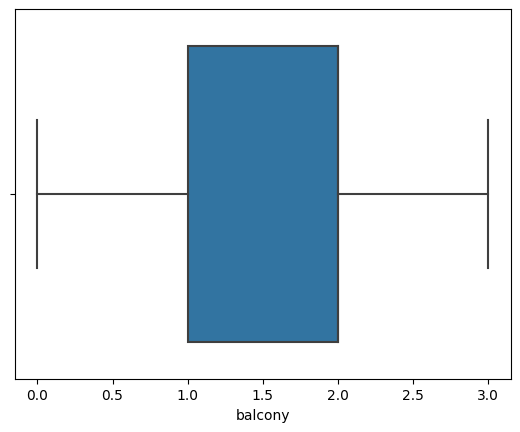

In [561]:
sns.boxplot(df["balcony"])

In [562]:
df.corr()

,availability,size,total_sqft,bath,balcony,price,area_type_Built_up_Area,area_type_Carpet_Area,area_type_Plot_Area,area_type_Super_built_up_Area
availability,1.000000,0.028067,-0.026226,-0.041380,-0.112178,-0.037534,-0.115682,0.008766,-0.103576,0.171134
size,0.028067,1.000000,0.377263,0.201690,0.246997,-0.005254,-0.042036,0.001875,-0.341124,0.292422
total_sqft,-0.026226,0.377263,1.000000,0.481797,0.240230,0.218815,-0.032947,-0.018772,-0.025032,0.048971
bath,-0.041380,0.201690,0.481797,1.000000,0.258128,0.273736,-0.013989,-0.001695,0.188359,-0.131087
balcony,-0.112178,0.246997,0.240230,0.258128,1.000000,0.124951,-0.062810,-0.016821,-0.081458,0.115703
price,-0.037534,-0.005254,0.218815,0.273736,0.124951,1.000000,-0.026177,-0.012553,0.272669,-0.183222
area_type_Built_up_Area,-0.115682,-0.042036,-0.032947,-0.013989,-0.062810,-0.026177,1.000000,-0.038186,-0.199409,-0.656025
area_type_Carpet_Area,0.008766,0.001875,-0.018772,-0.001695,-0.016821,-0.012553,-0.038186,1.000000,-0.034332,-0.112947
area_type_Plot_Area,-0.103576,-0.341124,-0.025032,0.188359,-0.081458,0.272669,-0.199409,-0.034332,1.000000,-0.589814
area_type_Super_built_up_Area,0.171134,0.292422,0.048971,-0.131087,0.115703,-0.183222,-0.656025,-0.112947,-0.589814,1.000000


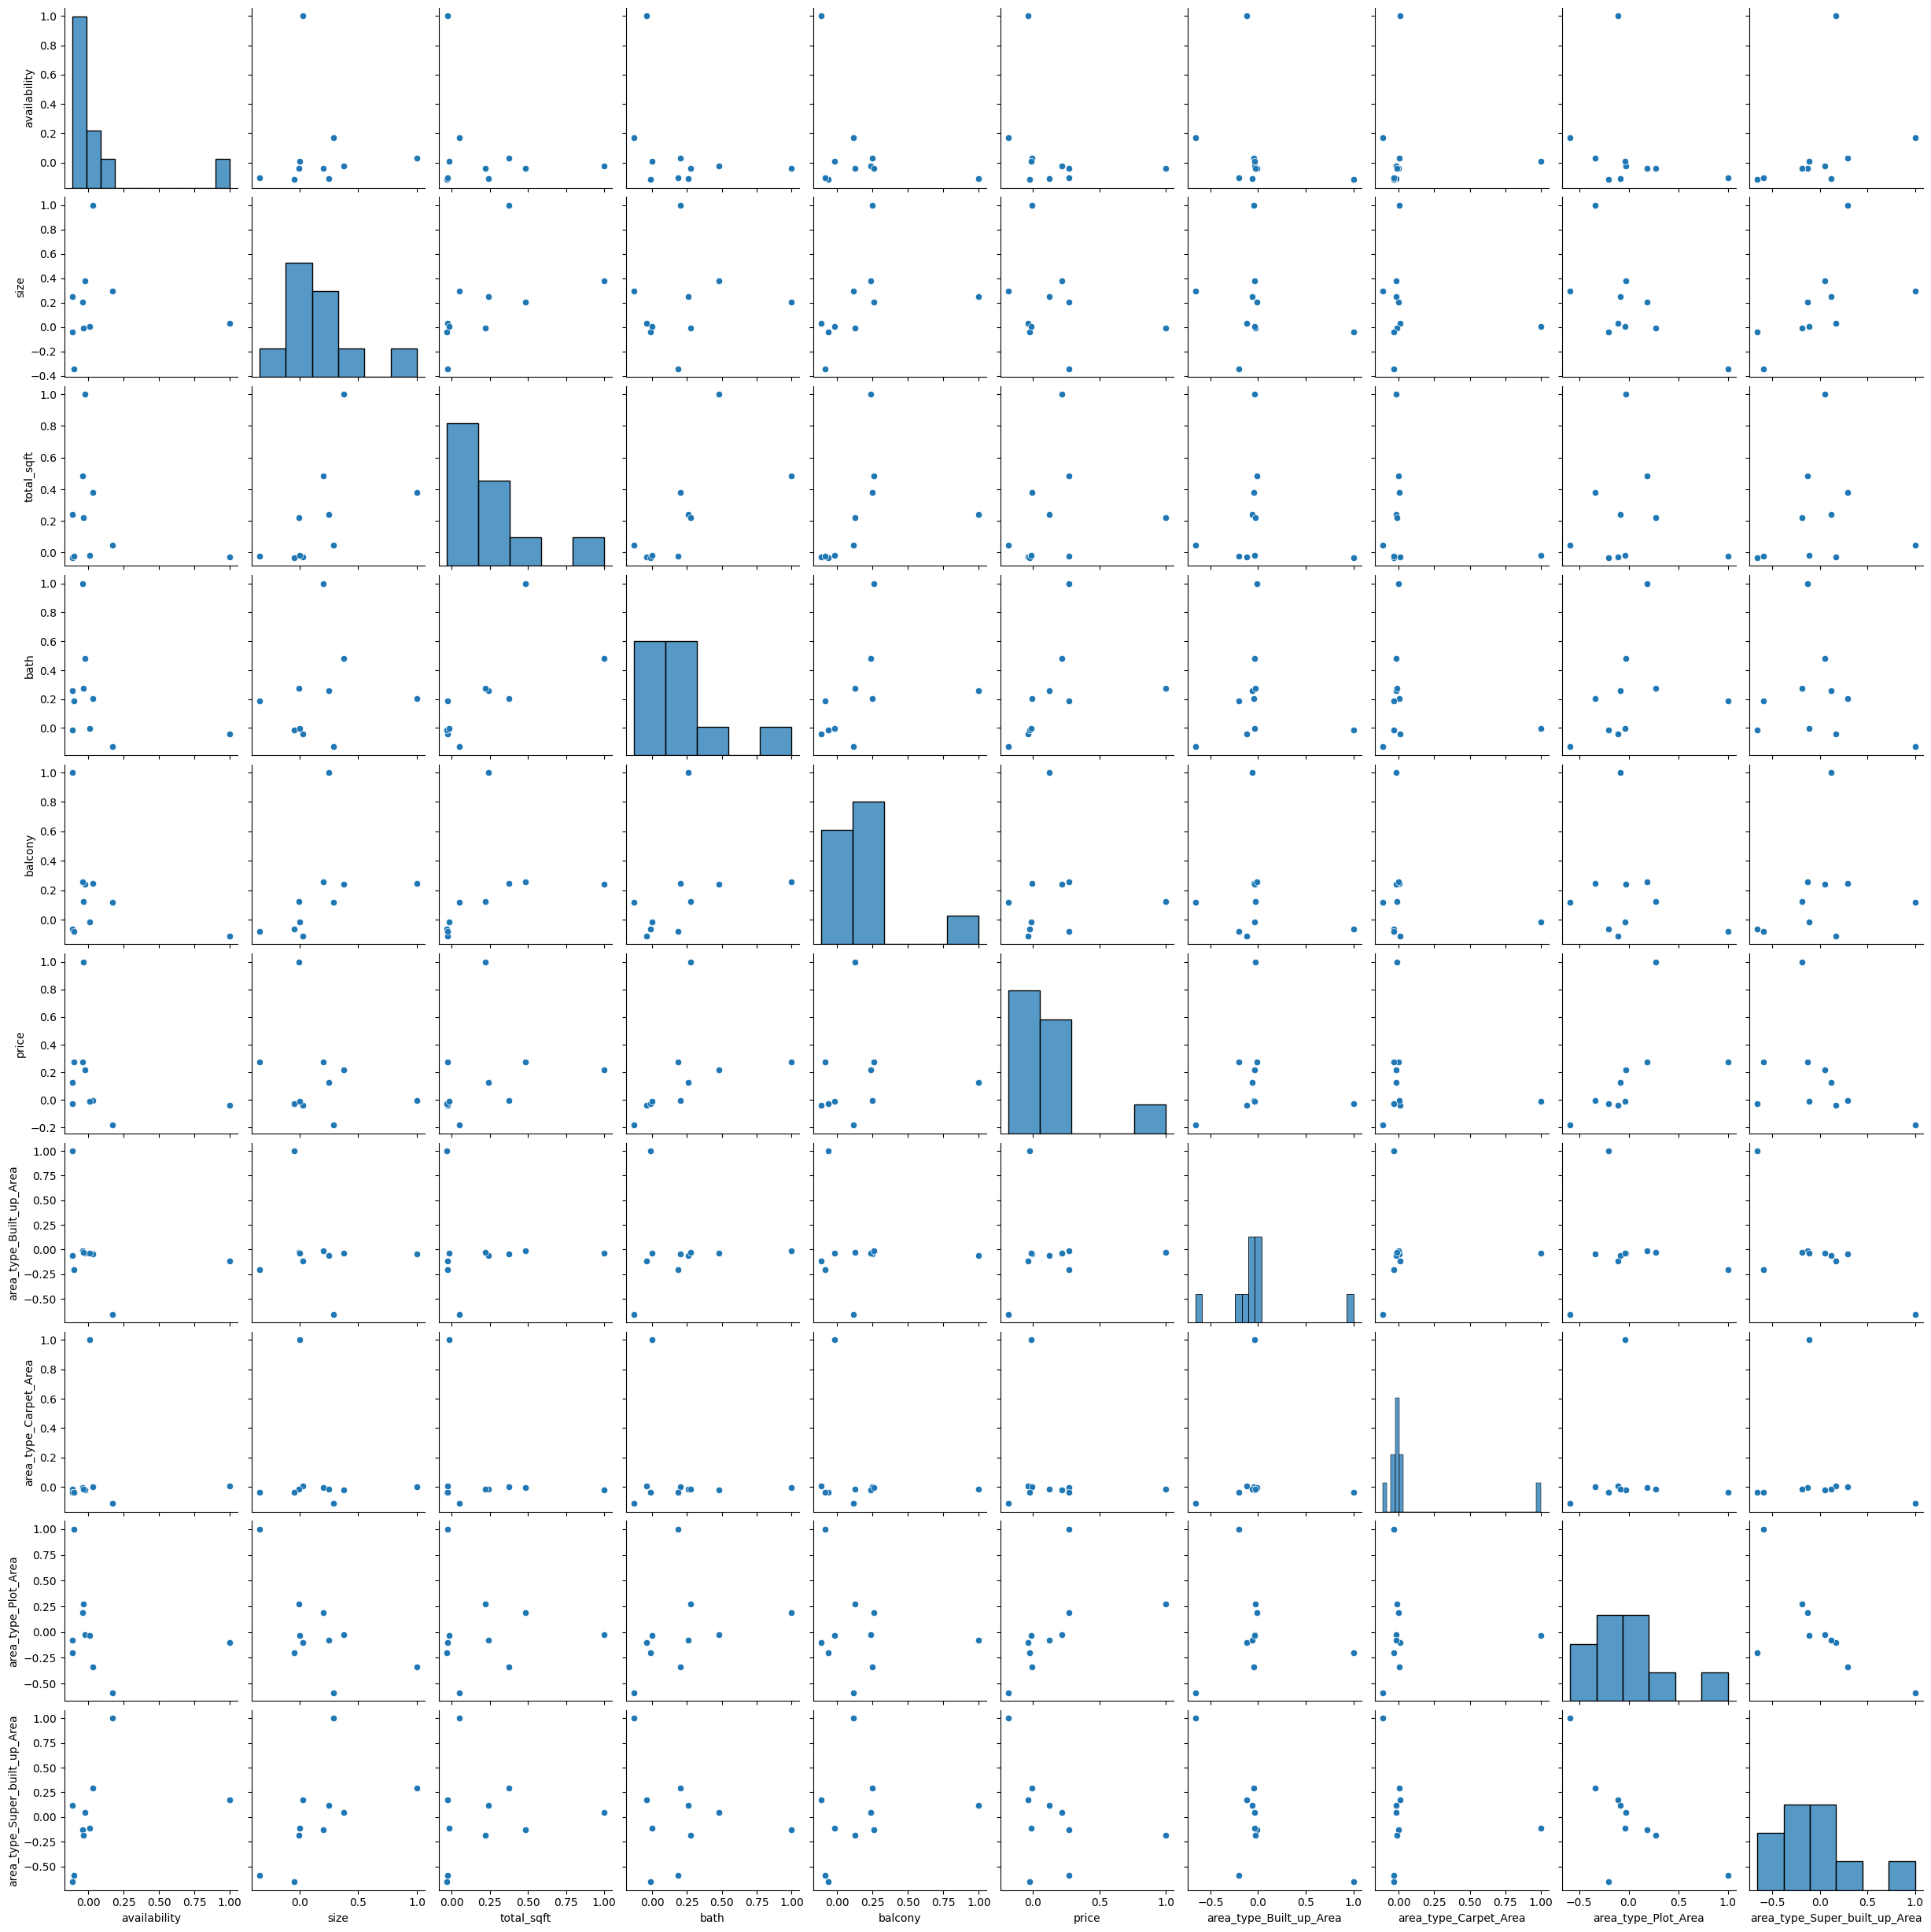

In [563]:
sns.pairplot(df.corr())

In [564]:
df.isna().sum()

availability                     0
size                             0
total_sqft                       0
bath                             0
balcony                          0
price                            0
area_type_Built_up_Area          0
area_type_Carpet_Area            0
area_type_Plot_Area              0
area_type_Super_built_up_Area    0
dtype: int64

In [565]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   availability                   13320 non-null  int64  
 1   size                           13320 non-null  int64  
 2   total_sqft                     13320 non-null  float64
 3   bath                           13320 non-null  float64
 4   balcony                        13320 non-null  int32  
 5   price                          13320 non-null  float64
 6   area_type_Built_up_Area        13320 non-null  uint8  
 7   area_type_Carpet_Area          13320 non-null  uint8  
 8   area_type_Plot_Area            13320 non-null  uint8  
 9   area_type_Super_built_up_Area  13320 non-null  uint8  
dtypes: float64(3), int32(1), int64(2), uint8(4)
memory usage: 624.5 KB


## Train model 

In [566]:
x = df.drop("price",axis=1)
y = df["price"]

In [567]:
x_train , x_test ,y_train ,y_test = train_test_split(x,y,test_size=0.2,random_state=21)

In [568]:
model = LinearRegression()
model

LinearRegression()

In [569]:
model.fit(x_train,y_train)

LinearRegression()

## Model Evaluation

In [570]:
# Testing Dataset
y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_test, y_pred)
print("MAE :",mae)

r2 = r2_score(y_test, y_pred)
print("R Squared :",r2)

MSE : 12950.130975184036
RMSE : 113.79864223787574
MAE : 57.3528348276688
R Squared : 0.18932614373524803


In [571]:
# training Data Set
y_pred_train = model.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("MAE :",mae)

r2 = r2_score(y_train, y_pred_train)
print("R Squared :",r2)

MSE : 20347.870095570623
RMSE : 142.64596067036257
MAE : 59.3567642186252
R Squared : 0.14304748455747063


In [572]:
availability_dict
size_dict
print(availability_dict)
print(size_dict)

{'(1, 1)': 0, '(14, 11)': 1, '(14, 7)': 2, '(15, 10)': 3, '(15, 11)': 4, '(15, 12)': 5, '(15, 6)': 6, '(15, 8)': 7, '(16, 1)': 8, '(16, 10)': 9, '(16, 11)': 10, '(16, 12)': 11, '(16, 3)': 12, '(16, 7)': 13, '(16, 9)': 14, '(17, 1)': 15, '(17, 10)': 16, '(17, 11)': 17, '(17, 12)': 18, '(17, 2)': 19, '(17, 3)': 20, '(17, 4)': 21, '(17, 5)': 22, '(17, 6)': 23, '(17, 7)': 24, '(17, 8)': 25, '(17, 9)': 26, '(18, 1)': 27, '(18, 10)': 28, '(18, 11)': 29, '(18, 12)': 30, '(18, 2)': 31, '(18, 3)': 32, '(18, 4)': 33, '(18, 5)': 34, '(18, 6)': 35, '(18, 7)': 36, '(18, 8)': 37, '(18, 9)': 38, '(19, 1)': 39, '(19, 10)': 40, '(19, 11)': 41, '(19, 12)': 42, '(19, 2)': 43, '(19, 3)': 44, '(19, 4)': 45, '(19, 5)': 46, '(19, 6)': 47, '(19, 7)': 48, '(19, 8)': 49, '(19, 9)': 50, '(2, 1)': 51, '(20, 1)': 52, '(20, 10)': 53, '(20, 11)': 54, '(20, 12)': 55, '(20, 2)': 56, '(20, 3)': 57, '(20, 4)': 58, '(20, 5)': 59, '(20, 6)': 60, '(20, 7)': 61, '(20, 8)': 62, '(20, 9)': 63, '(21, 1)': 64, '(21, 10)': 65, '

In [573]:
### Test model on single row

In [574]:
df.head(1).T

,0
availability,42.00
size,7.00
total_sqft,1056.00
bath,2.00
balcony,1.00
price,39.07
area_type_Built_up_Area,0.00
area_type_Carpet_Area,0.00
area_type_Plot_Area,0.00
area_type_Super_built_up_Area,1.00


In [579]:
availability = '(14, 11)'
size = '1 RK'
total_sqft = 1056.00
bath = 2.00
balcony = 1.00

area_type = "Built_up_Area"



In [580]:
size_dict[size]

0

In [581]:
availability_dict

{'(1, 1)': 0,
 '(14, 11)': 1,
 '(14, 7)': 2,
 '(15, 10)': 3,
 '(15, 11)': 4,
 '(15, 12)': 5,
 '(15, 6)': 6,
 '(15, 8)': 7,
 '(16, 1)': 8,
 '(16, 10)': 9,
 '(16, 11)': 10,
 '(16, 12)': 11,
 '(16, 3)': 12,
 '(16, 7)': 13,
 '(16, 9)': 14,
 '(17, 1)': 15,
 '(17, 10)': 16,
 '(17, 11)': 17,
 '(17, 12)': 18,
 '(17, 2)': 19,
 '(17, 3)': 20,
 '(17, 4)': 21,
 '(17, 5)': 22,
 '(17, 6)': 23,
 '(17, 7)': 24,
 '(17, 8)': 25,
 '(17, 9)': 26,
 '(18, 1)': 27,
 '(18, 10)': 28,
 '(18, 11)': 29,
 '(18, 12)': 30,
 '(18, 2)': 31,
 '(18, 3)': 32,
 '(18, 4)': 33,
 '(18, 5)': 34,
 '(18, 6)': 35,
 '(18, 7)': 36,
 '(18, 8)': 37,
 '(18, 9)': 38,
 '(19, 1)': 39,
 '(19, 10)': 40,
 '(19, 11)': 41,
 '(19, 12)': 42,
 '(19, 2)': 43,
 '(19, 3)': 44,
 '(19, 4)': 45,
 '(19, 5)': 46,
 '(19, 6)': 47,
 '(19, 7)': 48,
 '(19, 8)': 49,
 '(19, 9)': 50,
 '(2, 1)': 51,
 '(20, 1)': 52,
 '(20, 10)': 53,
 '(20, 11)': 54,
 '(20, 12)': 55,
 '(20, 2)': 56,
 '(20, 3)': 57,
 '(20, 4)': 58,
 '(20, 5)': 59,
 '(20, 6)': 60,
 '(20, 7)': 61,
 

In [582]:
availability_dict[availability]

1

In [583]:
column_name = x.columns
column_name

Index(['availability', 'size', 'total_sqft', 'bath', 'balcony',
       'area_type_Built_up_Area', 'area_type_Carpet_Area',
       'area_type_Plot_Area', 'area_type_Super_built_up_Area'],
      dtype='object')

In [584]:
area_type_col = "area_type_" + area_type
area_type_col

'area_type_Built_up_Area'

In [585]:
area_type_index = np.where(column_name == area_type_col )[0][0]
area_type_index

5

In [586]:
array = np.zeros(len(column_name),dtype=int)
array

array([0, 0, 0, 0, 0, 0, 0, 0, 0])

In [588]:
array[0] = availability_dict[availability]
array[1] = size_dict[size]
array[2] = 1056.00
array[3] = 2.00
array[4] = 1.00
array[area_type_index] = 1
array

array([   1,    0, 1056,    2,    1,    1,    0,    0,    0])

In [590]:
availability = '(1, 1)'
availability_dict[availability]

0

In [591]:
array[0] = availability_dict[availability]
array

array([   0,    0, 1056,    2,    1,    1,    0,    0,    0])

In [594]:
y_prediction = model.predict([array])[0]
y_prediction

83.75488901653121

In [595]:
data = {"availability_dict":availability_dict,"size_dict":size_dict,
       "column_name":list(column_name)}
data

{'availability_dict': {'(1, 1)': 0,
  '(14, 11)': 1,
  '(14, 7)': 2,
  '(15, 10)': 3,
  '(15, 11)': 4,
  '(15, 12)': 5,
  '(15, 6)': 6,
  '(15, 8)': 7,
  '(16, 1)': 8,
  '(16, 10)': 9,
  '(16, 11)': 10,
  '(16, 12)': 11,
  '(16, 3)': 12,
  '(16, 7)': 13,
  '(16, 9)': 14,
  '(17, 1)': 15,
  '(17, 10)': 16,
  '(17, 11)': 17,
  '(17, 12)': 18,
  '(17, 2)': 19,
  '(17, 3)': 20,
  '(17, 4)': 21,
  '(17, 5)': 22,
  '(17, 6)': 23,
  '(17, 7)': 24,
  '(17, 8)': 25,
  '(17, 9)': 26,
  '(18, 1)': 27,
  '(18, 10)': 28,
  '(18, 11)': 29,
  '(18, 12)': 30,
  '(18, 2)': 31,
  '(18, 3)': 32,
  '(18, 4)': 33,
  '(18, 5)': 34,
  '(18, 6)': 35,
  '(18, 7)': 36,
  '(18, 8)': 37,
  '(18, 9)': 38,
  '(19, 1)': 39,
  '(19, 10)': 40,
  '(19, 11)': 41,
  '(19, 12)': 42,
  '(19, 2)': 43,
  '(19, 3)': 44,
  '(19, 4)': 45,
  '(19, 5)': 46,
  '(19, 6)': 47,
  '(19, 7)': 48,
  '(19, 8)': 49,
  '(19, 9)': 50,
  '(2, 1)': 51,
  '(20, 1)': 52,
  '(20, 10)': 53,
  '(20, 11)': 54,
  '(20, 12)': 55,
  '(20, 2)': 56,
  '

In [596]:
import json 

with open("data.json","w")as f:
    json.dump(data,f)

In [597]:
import pickle

with open("model.pkl","wb")as f:
    pickle.dump(model,f)

In [599]:
df["availability"].unique()

array([42,  0, 34, 31, 29, 55, 16, 67, 50, 63, 32, 56, 33, 62, 28, 44, 26,
       30, 25, 45, 35, 77, 75, 37, 39, 24, 36, 71, 59, 49, 38, 22, 23, 70,
       27, 57, 18, 12, 47, 80, 48, 68, 51, 46, 17, 53, 60, 43, 65, 64, 20,
       21, 79, 40, 72, 66, 69, 11, 78, 52, 74, 73,  1, 41,  4, 13,  6, 19,
       54, 61, 14,  3,  5,  9, 76,  7, 15, 10, 58,  8,  2], dtype=int64)